In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F

import time

%matplotlib inline
plt.style.use('ggplot')
%config InlineBackend.figure_format='retina'

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device('cpu')
print(device)

cpu


In [3]:
costs = pd.read_csv("~/code/fifteen-puzzle/data/datasets/15-costs.csv", nrows=20000)
costs.shape

(20000, 17)

In [4]:
costs.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,cost
0,13,4,7,15,8,0,2,1,9,6,10,14,3,12,5,11,56
1,10,2,4,12,3,13,8,0,1,5,6,7,14,9,11,15,34
2,8,15,11,14,13,5,6,7,4,9,12,0,1,2,10,3,59
3,1,0,10,6,2,3,14,8,9,7,4,13,5,11,12,15,43
4,1,5,6,8,3,4,9,14,11,10,2,12,13,15,0,7,41


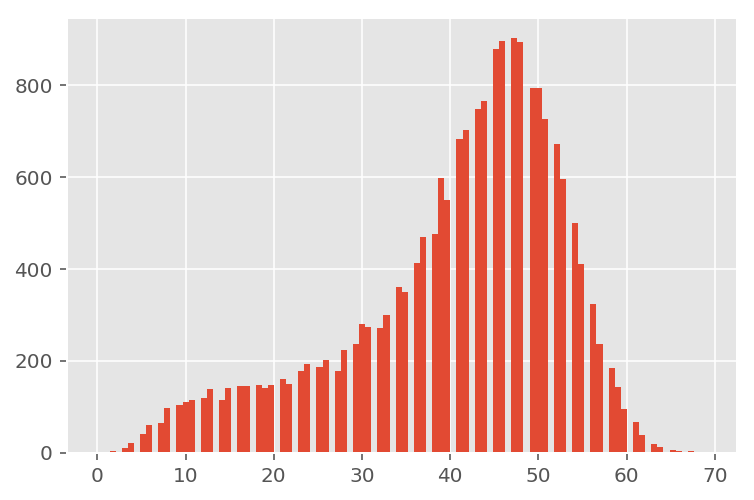

In [5]:
costs['cost'].hist(bins=100)

In [6]:
X = costs.iloc[:,:-1].values.copy()
y = costs['cost'].values.reshape(-1, 1).copy()

In [7]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(categories='auto')
X = one_hot_encoder.fit_transform(X).toarray();

In [9]:
x = torch.tensor(X, dtype=torch.float, device=device)
y = torch.tensor(y, dtype=torch.float, device=device)

In [10]:
x.shape

torch.Size([20000, 256])

In [11]:
y.shape

torch.Size([20000, 1])

In [12]:
model = torch.nn.Sequential(
          torch.nn.Linear(256, 128),
          torch.nn.ReLU(),
          torch.nn.Linear(128, 1),
).to(device)

loss_fn = torch.nn.MSELoss(reduction='mean')
learning_rate = 1e-3

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, eps=0)

bs = 256

for epoch in range(1):
    for i in range((x.shape[0] - 1) // bs + 1):
        start_i = i * bs
        end_i = start_i + bs
        xb = x[start_i:end_i]
        yb = x[start_i:end_i]
        pred = model(xb)
        loss = loss_fn(pred, yb)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
model.eval()
y_pred = model.forward(x).detach().numpy()
y_real = y.numpy().reshape(-1, 1)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_real)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').